torchvision package는 popular datsets, model architectures, common image transformation등을 포함하고 있다.

## Reading Data

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
training_epochs = 15
batch_size = 100

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/', 
                         train=True, 
                         transform=transforms.ToTensor(), 
                         download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', 
                        train=False, 
                        transform=transforms.ToTensor(), 
                        download=True)
#어디에 있는지, mnist의 train set 불러오겠다, transform: 어떤 transform 적용해서 불러올건지(여기선 0~255 값을 0~1값으로), 
#mnist존재 하지 않으면 다운 받겠다.


In [5]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, 
                                     batch_size=batch_size, 
                                     shuffle=True, 
                                     drop_last=True) 
#drop_last: batch size로 자르고 남은 데이터 사용할건지 아닌지

## Softmax

In [ ]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [7]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [33]:
for epoch in range(training_epochs):
    total_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        total_cost += cost  # total_cost += cost,  avg_cost = total_cost /2
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(total_cost/ total_batch))
    
print('Learning finished')

Epoch: 0001 cost = 0.264985085
Epoch: 0002 cost = 0.264109641
Epoch: 0003 cost = 0.263380587
Epoch: 0004 cost = 0.262667894
Epoch: 0005 cost = 0.262044668
Epoch: 0006 cost = 0.261580855
Epoch: 0007 cost = 0.260676533
Epoch: 0008 cost = 0.260087579
Epoch: 0009 cost = 0.259862036
Epoch: 0010 cost = 0.259002864
Epoch: 0011 cost = 0.258652389
Epoch: 0012 cost = 0.258155227
Epoch: 0013 cost = 0.257641494
Epoch: 0014 cost = 0.257250369
Epoch: 0015 cost = 0.256843030
Learning finished


## Test

In [37]:
with torch.no_grad():  #gradient 계산 안하겠다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction  = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    print(correct_prediction)
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

tensor([1, 1, 1,  ..., 1, 0, 1], dtype=torch.uint8)
Accuracy:  0.8704000115394592


## Visualization

Label:  8
Prediction:  8


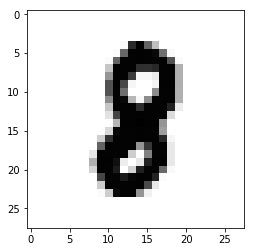

In [47]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, len(mnist_test) -1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print("Label: ", Y_single_data.item())
single_prediction = linear(X_single_data)
print("Prediction: ", torch.argmax(single_prediction,1).item())

plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
plt.show()